In [4]:
library(readxl)
library(ggplot2)
library(hrbrthemes)
library(GGally)
library(gridExtra)
library(fmsb)
library(hrbrthemes)
library(viridis)
options(warning=-1)

# Boxplot

In [132]:
info1 <- read_excel("All_1_1.xlsx")
info1.df <- as.data.frame(info1)
info1.m <- as.matrix(info1)
info2 <- read_excel("All_1_2.xlsx")
info2.df <- as.data.frame(info2)
info2.m <- as.matrix(info2)

In [187]:
# Boxplot 
options(warning=-1)
num1 <- length(info1.m[,21])
num2 <- length(info2.m[,21])
nm <- c(rep("Round 1 of Group 1",num1),rep("Round 2 of Group 1",num2),
        rep("Round 1 of Group 2",num1),rep("Round 2 of Group 2",num2))
data <- data.frame(
    name = nm,
    value = c(info1.m[,21],info1.m[,22],info2.m[,21],info2.m[,22])
)
pdf("Boxplot.pdf",width = 9,height = 4)
ggplot(data, aes(x=name, y=value, fill=name)) +
    geom_boxplot() + xlab("") + ylab("Number of Safe Options") +
    scale_fill_viridis(discrete = TRUE, alpha=0.4, option="A") +
    #theme_ipsum() +
    theme(legend.position="none") 
dev.off()

png 
  2

# Proportion of Safe Choices for Each Decision

## Group 1

In [15]:
info <- read_excel("Lab_1_1_prop.xlsx")
info.df <- as.data.frame(info)
info.m <- as.matrix(info)

r1 <- info.m[,1]
r2 <- info.m[,2]
x=c(1:10)

pdf("Proportion_of_Safe_Choices_for_Each_Decision_1.pdf",width = 9,height = 4)

plot(r1~x , type="b" , bty="l" ,xlab="Decision of Group 1" , ylab="Proportion" , col=rgb(0.2,0.4,0.1,0.7) , lwd=3 , pch=17 , ylim=c(0,1),xaxt = "n")
axis(side=1,at=x,labels = x)
lines(r2~x, col=rgb(0.8,0.4,0.1,0.7) , lwd=3 , pch=19 , type="b" )

legend("bottomleft", 
  legend = c("Round 1", "Round 2"), 
  col = c(rgb(0.2,0.4,0.1,0.7), 
  rgb(0.8,0.4,0.1,0.7)), 
  pch = c(17,19), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.2, 
  text.col = "black", 
  horiz = F, 
  inset = c(0.1, 0.1))
dev.off()

png 
  2

## Group 2

In [16]:
info <- read_excel("Lab_1_2_prop.xlsx")
info.df <- as.data.frame(info)
info.m <- as.matrix(info)

r1 <- info.m[,1]
r2 <- info.m[,2]
x=c(1:10)

pdf("Proportion_of_Safe_Choices_for_Each_Decision_2.pdf",width = 9,height = 4)

plot(r1~x , type="b" , bty="l" ,xlab="Decision of Group 2" , ylab="Proportion" , col=rgb(0.2,0.4,0.1,0.7) , lwd=3 , pch=17 , ylim=c(0,1),xaxt = "n")
axis(side=1,at=x,labels = x)
lines(r2~x, col=rgb(0.8,0.4,0.1,0.7) , lwd=3 , pch=19 , type="b" )

legend("bottomleft", 
  legend = c("Round 1", "Round 2"), 
  col = c(rgb(0.2,0.4,0.1,0.7), 
  rgb(0.8,0.4,0.1,0.7)), 
  pch = c(17,19), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.2, 
  text.col = "black", 
  horiz = F, 
  inset = c(0.1, 0.1))
dev.off()

png 
  2

# Proportion

## Group 1

In [110]:
info1 <- read_excel("All_1_1.xlsx")
info1.df <- as.data.frame(info1)
info1.m <- as.matrix(info1)

In [3]:
prop.g1 <- c(sum(info1.m[,"r1_s"]<=1)/nrow(info1),
          sum(info1.m[,"r1_s"]==2)/nrow(info1),
          sum(info1.m[,"r1_s"]==3)/nrow(info1),
          sum(info1.m[,"r1_s"]==4)/nrow(info1),
          sum(info1.m[,"r1_s"]==5)/nrow(info1),
          sum(info1.m[,"r1_s"]==6)/nrow(info1),
          sum(info1.m[,"r1_s"]==7)/nrow(info1),
          sum(info1.m[,"r1_s"]==8)/nrow(info1),
          sum(info1.m[,"r1_s"]>=9)/nrow(info1))
prop.g2 <- c(sum(info1.m[,"r2_s"]<=1)/nrow(info1),
          sum(info1.m[,"r2_s"]==2)/nrow(info1),
          sum(info1.m[,"r2_s"]==3)/nrow(info1),
          sum(info1.m[,"r2_s"]==4)/nrow(info1),
          sum(info1.m[,"r2_s"]==5)/nrow(info1),
          sum(info1.m[,"r2_s"]==6)/nrow(info1),
          sum(info1.m[,"r2_s"]==7)/nrow(info1),
          sum(info1.m[,"r2_s"]==8)/nrow(info1),
          sum(info1.m[,"r2_s"]>=9)/nrow(info1))

In [5]:
data <- data.frame(
    ra=factor(c("highly risk loving","very risk loving","risk loving",
         "risk neutral","slightly risk averse","risk averse",
         "very risk averse","highly risk averse","stay in bed"),levels =c("highly risk loving","very risk loving","risk loving",
         "risk neutral","slightly risk averse","risk averse",
         "very risk averse","highly risk averse","stay in bed")),
    value1=prop.g1,
    value2=prop.g2
)

pdf("Prop_1_1.pdf",width = 12,height = 4)
p1<-ggplot(data) +
    geom_bar( aes(x=ra, y=value1), stat="identity", fill="skyblue", alpha=0.7) +
    ylab("Proportion of Round 1") + xlab("") + scale_y_continuous(limits=c(0,0.5)) +
    theme(axis.text.x = element_text(size = 12),axis.text.y = element_text(size = 12),
          panel.border = element_blank(),panel.grid.major = element_blank())+
    coord_flip()
p2<-ggplot(data) +
    geom_bar( aes(x=ra, y=value2), stat="identity", fill="orange", alpha=0.7) +
    ylab("Proportion of Round 2") + xlab("") + scale_y_continuous(limits=c(0,0.5)) +
    theme(axis.text.x = element_text(size = 12),axis.text.y = element_text(size = 12),
         panel.border = element_blank(),panel.grid.major = element_blank()) +
    coord_flip()
grid.arrange(p1,p2,ncol=2)
dev.off()

png 
  2

## Group 2

In [107]:
info1 <- read_excel("All_1_2.xlsx")
info1.df <- as.data.frame(info1)
info1.m <- as.matrix(info1)

In [7]:
prop.g1 <- c(sum(info1.m[,"r1_s"]<=1)/nrow(info1),
          sum(info1.m[,"r1_s"]==2)/nrow(info1),
          sum(info1.m[,"r1_s"]==3)/nrow(info1),
          sum(info1.m[,"r1_s"]==4)/nrow(info1),
          sum(info1.m[,"r1_s"]==5)/nrow(info1),
          sum(info1.m[,"r1_s"]==6)/nrow(info1),
          sum(info1.m[,"r1_s"]==7)/nrow(info1),
          sum(info1.m[,"r1_s"]==8)/nrow(info1),
          sum(info1.m[,"r1_s"]>=9)/nrow(info1))
prop.g2 <- c(sum(info1.m[,"r2_s"]<=1)/nrow(info1),
          sum(info1.m[,"r2_s"]==2)/nrow(info1),
          sum(info1.m[,"r2_s"]==3)/nrow(info1),
          sum(info1.m[,"r2_s"]==4)/nrow(info1),
          sum(info1.m[,"r2_s"]==5)/nrow(info1),
          sum(info1.m[,"r2_s"]==6)/nrow(info1),
          sum(info1.m[,"r2_s"]==7)/nrow(info1),
          sum(info1.m[,"r2_s"]==8)/nrow(info1),
          sum(info1.m[,"r2_s"]>=9)/nrow(info1))

In [8]:
data <- data.frame(
    ra=factor(c("highly risk loving","very risk loving","risk loving",
         "risk neutral","slightly risk averse","risk averse",
         "very risk averse","highly risk averse","stay in bed"),levels =c("highly risk loving","very risk loving","risk loving",
         "risk neutral","slightly risk averse","risk averse",
         "very risk averse","highly risk averse","stay in bed")),
    value1=prop.g1,
    value2=prop.g2
)


pdf("Prop_1_2.pdf",width = 12,height = 4)
p1<-ggplot(data) +
    geom_bar( aes(x=ra, y=value1), stat="identity", fill="skyblue", alpha=0.7) +
    ylab("Proportion of Round 1") + xlab("") + scale_y_continuous(limits=c(0,0.5)) +
    theme(axis.text.x = element_text(size = 12),axis.text.y = element_text(size = 12),
          panel.border = element_blank(),panel.grid.major = element_blank())+
    coord_flip()
p2<-ggplot(data) +
    geom_bar( aes(x=ra, y=value2), stat="identity", fill="orange", alpha=0.7) +
    ylab("Proportion of Round 2") + xlab("") + scale_y_continuous(limits=c(0,0.5)) +
    theme(axis.text.x = element_text(size = 12),axis.text.y = element_text(size = 12),
         panel.border = element_blank(),panel.grid.major = element_blank()) +
    coord_flip()
grid.arrange(p1,p2,ncol=2)
dev.off()

png 
  2

In [ ]:
# Others

# Change of Risk Attitude
## Group 1

In [92]:
info2 <- read_excel("All_1_1.xlsx")
info2.df <- as.data.frame(info2)
info2.m <- as.matrix(info2)


info2.df["r1_att"] = as.integer(info2.m[,"r1_s"]>4) - as.integer(info2.m[,"r1_s"]<4)
info2.df["r2_att"] = as.integer(info2.m[,"r2_s"]>4) - as.integer(info2.m[,"r2_s"]<4)
info2.m = as.matrix(info2.df)
info2.df["att_a_a"] = as.integer(info2.m[,"r1_att"]==-1 & info2.m[,"r2_att"]==-1)
info2.df["att_a_n"] = as.integer(info2.m[,"r1_att"]==-1 & info2.m[,"r2_att"]==0)
info2.df["att_a_r"] = as.integer(info2.m[,"r1_att"]==-1 & info2.m[,"r2_att"]==1)

info2.df["att_n_a"] = as.integer(info2.m[,"r1_att"]==0 & info2.m[,"r2_att"]==-1)
info2.df["att_n_n"] = as.integer(info2.m[,"r1_att"]==0 & info2.m[,"r2_att"]==0)
info2.df["att_n_r"] = as.integer(info2.m[,"r1_att"]==0 & info2.m[,"r2_att"]==1)

info2.df["att_r_a"] = as.integer(info2.m[,"r1_att"]==1 & info2.m[,"r2_att"]==-1)
info2.df["att_r_n"] = as.integer(info2.m[,"r1_att"]==1 & info2.m[,"r2_att"]==0)
info2.df["att_r_r"] = as.integer(info2.m[,"r1_att"]==1 & info2.m[,"r2_att"]==1)
info2.m = as.matrix(info2.df)

In [93]:
value <- c()
for(i in c(27:35)){
    value <- c(value,sum(info2.m[,i]))
}

In [94]:
data <- data.frame(
    ra=factor(c("Risk Averse -> Risk Averse","Risk Averse -> Risk Neutral","Risk Averse -> Risk Loving",
               "Risk Neutral -> Risk Averse","Risk Neutral -> Risk Neutral","Risk Neutral -> Risk Loving",
               "Risk Loving -> Risk Averse","Risk Loving -> Risk Neutral","Risk Loving -> Risk Loving"),
              levels = c("Risk Averse -> Risk Averse","Risk Averse -> Risk Neutral","Risk Averse -> Risk Loving",
               "Risk Neutral -> Risk Averse","Risk Neutral -> Risk Neutral","Risk Neutral -> Risk Loving",
               "Risk Loving -> Risk Averse","Risk Loving -> Risk Neutral","Risk Loving -> Risk Loving")),
    value=value
)

pdf("Att_Change_1_1.pdf",width = 9,height = 4)

ggplot(data) +
    geom_bar( aes(x=ra, y=value), stat="identity", fill="skyblue", alpha=0.7) +
    ylab("Proportion of Round 1") + xlab("") +
    theme(axis.text.x = element_text(size = 12),axis.text.y = element_text(size = 12),
          panel.border = element_blank(),panel.grid.major = element_blank())+
    coord_flip()
dev.off()

png 
  2

## Group 2

In [96]:
info2 <- read_excel("All_1_2.xlsx")
info2.df <- as.data.frame(info2)
info2.m <- as.matrix(info2)


info2.df["r1_att"] = as.integer(info2.m[,"r1_s"]>4) - as.integer(info2.m[,"r1_s"]<4)
info2.df["r2_att"] = as.integer(info2.m[,"r2_s"]>4) - as.integer(info2.m[,"r2_s"]<4)
info2.m = as.matrix(info2.df)
info2.df["att_a_a"] = as.integer(info2.m[,"r1_att"]==-1 & info2.m[,"r2_att"]==-1)
info2.df["att_a_n"] = as.integer(info2.m[,"r1_att"]==-1 & info2.m[,"r2_att"]==0)
info2.df["att_a_r"] = as.integer(info2.m[,"r1_att"]==-1 & info2.m[,"r2_att"]==1)

info2.df["att_n_a"] = as.integer(info2.m[,"r1_att"]==0 & info2.m[,"r2_att"]==-1)
info2.df["att_n_n"] = as.integer(info2.m[,"r1_att"]==0 & info2.m[,"r2_att"]==0)
info2.df["att_n_r"] = as.integer(info2.m[,"r1_att"]==0 & info2.m[,"r2_att"]==1)

info2.df["att_r_a"] = as.integer(info2.m[,"r1_att"]==1 & info2.m[,"r2_att"]==-1)
info2.df["att_r_n"] = as.integer(info2.m[,"r1_att"]==1 & info2.m[,"r2_att"]==0)
info2.df["att_r_r"] = as.integer(info2.m[,"r1_att"]==1 & info2.m[,"r2_att"]==1)
info2.m = as.matrix(info2.df)

In [97]:
value <- c()
for(i in c(27:35)){
    value <- c(value,sum(info2.m[,i]))
}

In [98]:
data <- data.frame(
    ra=factor(c("Risk Averse -> Risk Averse","Risk Averse -> Risk Neutral","Risk Averse -> Risk Loving",
               "Risk Neutral -> Risk Averse","Risk Neutral -> Risk Neutral","Risk Neutral -> Risk Loving",
               "Risk Loving -> Risk Averse","Risk Loving -> Risk Neutral","Risk Loving -> Risk Loving"),
              levels = c("Risk Averse -> Risk Averse","Risk Averse -> Risk Neutral","Risk Averse -> Risk Loving",
               "Risk Neutral -> Risk Averse","Risk Neutral -> Risk Neutral","Risk Neutral -> Risk Loving",
               "Risk Loving -> Risk Averse","Risk Loving -> Risk Neutral","Risk Loving -> Risk Loving")),
    value=value
)

pdf("Att_Change_1_2.pdf",width = 9,height = 4)

ggplot(data) +
    geom_bar( aes(x=ra, y=value), stat="identity", fill="skyblue", alpha=0.7) +
    ylab("Proportion of Round 1") + xlab("") +
    theme(axis.text.x = element_text(size = 12),axis.text.y = element_text(size = 12),
          panel.border = element_blank(),panel.grid.major = element_blank())+
    coord_flip()
dev.off()

png 
  2

# Parallel coordinates chart

In [93]:
info2 <- read_excel("All_1_1.xlsx")
info2.df <- as.data.frame(info2)
info2.m <- as.matrix(info2)

info2.df["r1_att"] = as.integer(info2.m[,"r1_s"]>4) - as.integer(info2.m[,"r1_s"]<4)
info2.df["r2_att"] = as.integer(info2.m[,"r2_s"]>4) - as.integer(info2.m[,"r2_s"]<4)
info2.m = as.matrix(info2.df)



data <- info2.df[,c("r1_s","r2_s")]
data["gp"] <- rep("Group 1",67)

info2 <- read_excel("All_1_2.xlsx")
info2.df <- as.data.frame(info2)
info2.m <- as.matrix(info2)

info2.df["r1_att"] = as.integer(info2.m[,"r1_s"]>4) - as.integer(info2.m[,"r1_s"]<4)
info2.df["r2_att"] = as.integer(info2.m[,"r2_s"]>4) - as.integer(info2.m[,"r2_s"]<4)
info2.m = as.matrix(info2.df)

data.temp <- info2.df[,c("r1_s","r2_s")]
data.temp["gp"] = rep("Group 2", 59)
data <- rbind(data,data.temp)

In [95]:
data['gp'] <- factor(data[,"gp"])

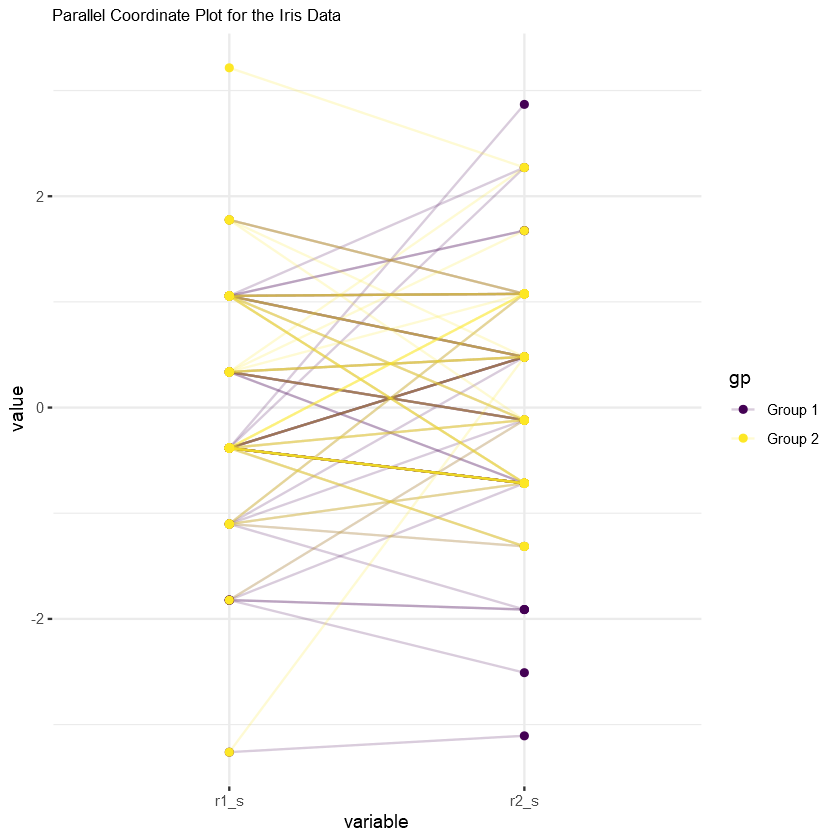

In [97]:
# Plot
ggparcoord(data,
    columns = 1:2, groupColumn = 3, order = "anyClass",
    showPoints = TRUE, 
    title = "Parallel Coordinate Plot for the Iris Data",
    alphaLines = 0.2
    ) + 
  scale_color_viridis(discrete=TRUE) +
  theme_ipsum()+
    theme_bw() +

  theme(panel.border = element_blank(),
        axis.line = element_line(colour = "white")) +
  theme(
    plot.title = element_text(size=10)
  )